# Homework 4 - Part 1

In this assignment, I will be downloading three related sets of data. I will be scouring the FRED database in order to retrieve these sets. The two .py files made during class will be made of use. They will be provided below before I get started. I will explain how I believe that the datasets are related, and provide visualizations to reinforce my thoughts.

Below are the plots.py and FRED.py files:

In [1]:
#plots.py
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_ts_scatter(df, s = 75, figsize = (40, 20), save_fig = False, pp = None):
    plot_vars = list(df.keys())
    for x in plot_vars:
        for y in plot_vars:
            if x != y:
                fig, ax = plt.subplots(figsize = figsize)
            
                if "Year" not in df.keys():
                    df["Year"] = [int(str(ind)[:4]) for ind in df.index]
                
                df.plot.scatter(x = x, y = y, s = s, ax = ax, c = "Year", cmap = "plasma")
                
                ax.tick_params(axis = 'x', rotation =90)
                ax.tick_params('both', length = 0, which = 'both')
                
                if save_fig:
                    try:
                        os.mkdir("plots")
                    except:
                        pass
                
                    directory = "plots/" + x[:12] + " " + y[:12] + " c=Year"
                    plt.savefig(directory + ".png")
                    if pp != None: pp.savefig(fig, bbox_inches = "tight")
                    
def plot_lines(df, linewidth = 1, figsize = (40,20), pp = None):
    
    fig, ax = plt.subplots(figsize = figsize)
    df.plot.line(linewidth = linewidth, ax = ax)
    ax.tick_params(axis = 'x', rotation = 90)
    ax.tick_params('both', length = 0, which = 'both')
    vals = ax.get_yticks()
    ax.set_yticklabels([int(x) for x in vals])
    
    remove_chars = "[]:$'\\"
    filename=str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")
    plt.savefig(filename[:50]+ " line.png", bbox_inches = "tight")
    if pp != None:
        pp.savefig(fig, bbox_inches = "tight")
        
def plot_stacked_lines(df, plot_vars, linewidth = 1, figsize = (40,20), pp = None, total_var = False):
    fig, ax = plt.subplots(figsize = figsize)
    df[plot_vars.].plot.area(stacked = True, linewidth = linewidth, ax = ax)
    
    if total_var != False:
        df[total_var].plot.line(linewidth = linewidth, ax = ax, c = 'k', label = total_var, ls = "--")
    ax.legend(loc = 2, ncol = 2)

In [2]:
#FRED.py
import pandas as pd
import pandas_datareader.data as web
import datetime

def gather_data(data_codes, start, end = datetime.datetime.today(), freq = "A"):
    i = 0;
    for key, code in data_codes.items():
        if i == 0:
            df = web.DataReader(code, "fred", start, end).resample(freq).mean()
            df.rename(columns = {code:key}, inplace = True)
            
            i = None
        else:
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
            
        return df
    
def bil_to_mil(series):
    # multiply billions by 1000 to yield millions
    return series * 10 ** 3

Now, onto the datasets. I was not too sure as to what direction I wanted to take with this. But after looking around, I stumbled upon some datasets that I would like to jointly observe. My datasets will look at the federal debt. They will showcase the gross federal debt, federal debt held by foreign and international investors and the federal debt held by federal reserve banks.

In [3]:
from datlib.plots import *
from datlib.FRED import *
data_codes = {"Federal Debt: Gross Federal Debt ($ Bil)": "FYGFD",
              "Federal Debt: Held by Foregin and International Investors ($ Bil)" : "FDHBFIN",
              "Federal Debt: Held by Federal Reserve Banks ($ Bil)" : "FDHBFRBN",         
             }

start = datetime.datetime(1970,1,1)
end = datetime.datetime.today()

data = gather_data(data_codes = data_codes, start = start, end = end, freq = "A")


data

,Federal Debt: Gross Federal Debt ($ Bil),Federal Debt: Held by Foregin and International Investors ($ Bil),Federal Debt: Held by Federal Reserve Banks ($ Bil)
DATE,,,
1970-12-31,380.9,15.675,58.90000
1971-12-31,408.2,35.975,66.87500
1972-12-31,435.9,51.775,70.22500
1973-12-31,466.3,58.500,76.00000
1974-12-31,483.9,56.425,80.37500
1975-12-31,541.9,65.750,85.25000
1976-12-31,629.0,72.650,94.40000
1977-12-31,706.4,94.425,101.42500
1978-12-31,776.6,124.500,109.15000


Now that we have our data loaded, we can start to analyze it. To start, we can use a stacked line graph, which will show the growth/decay across the years. We will code the function to construct our line graph below:

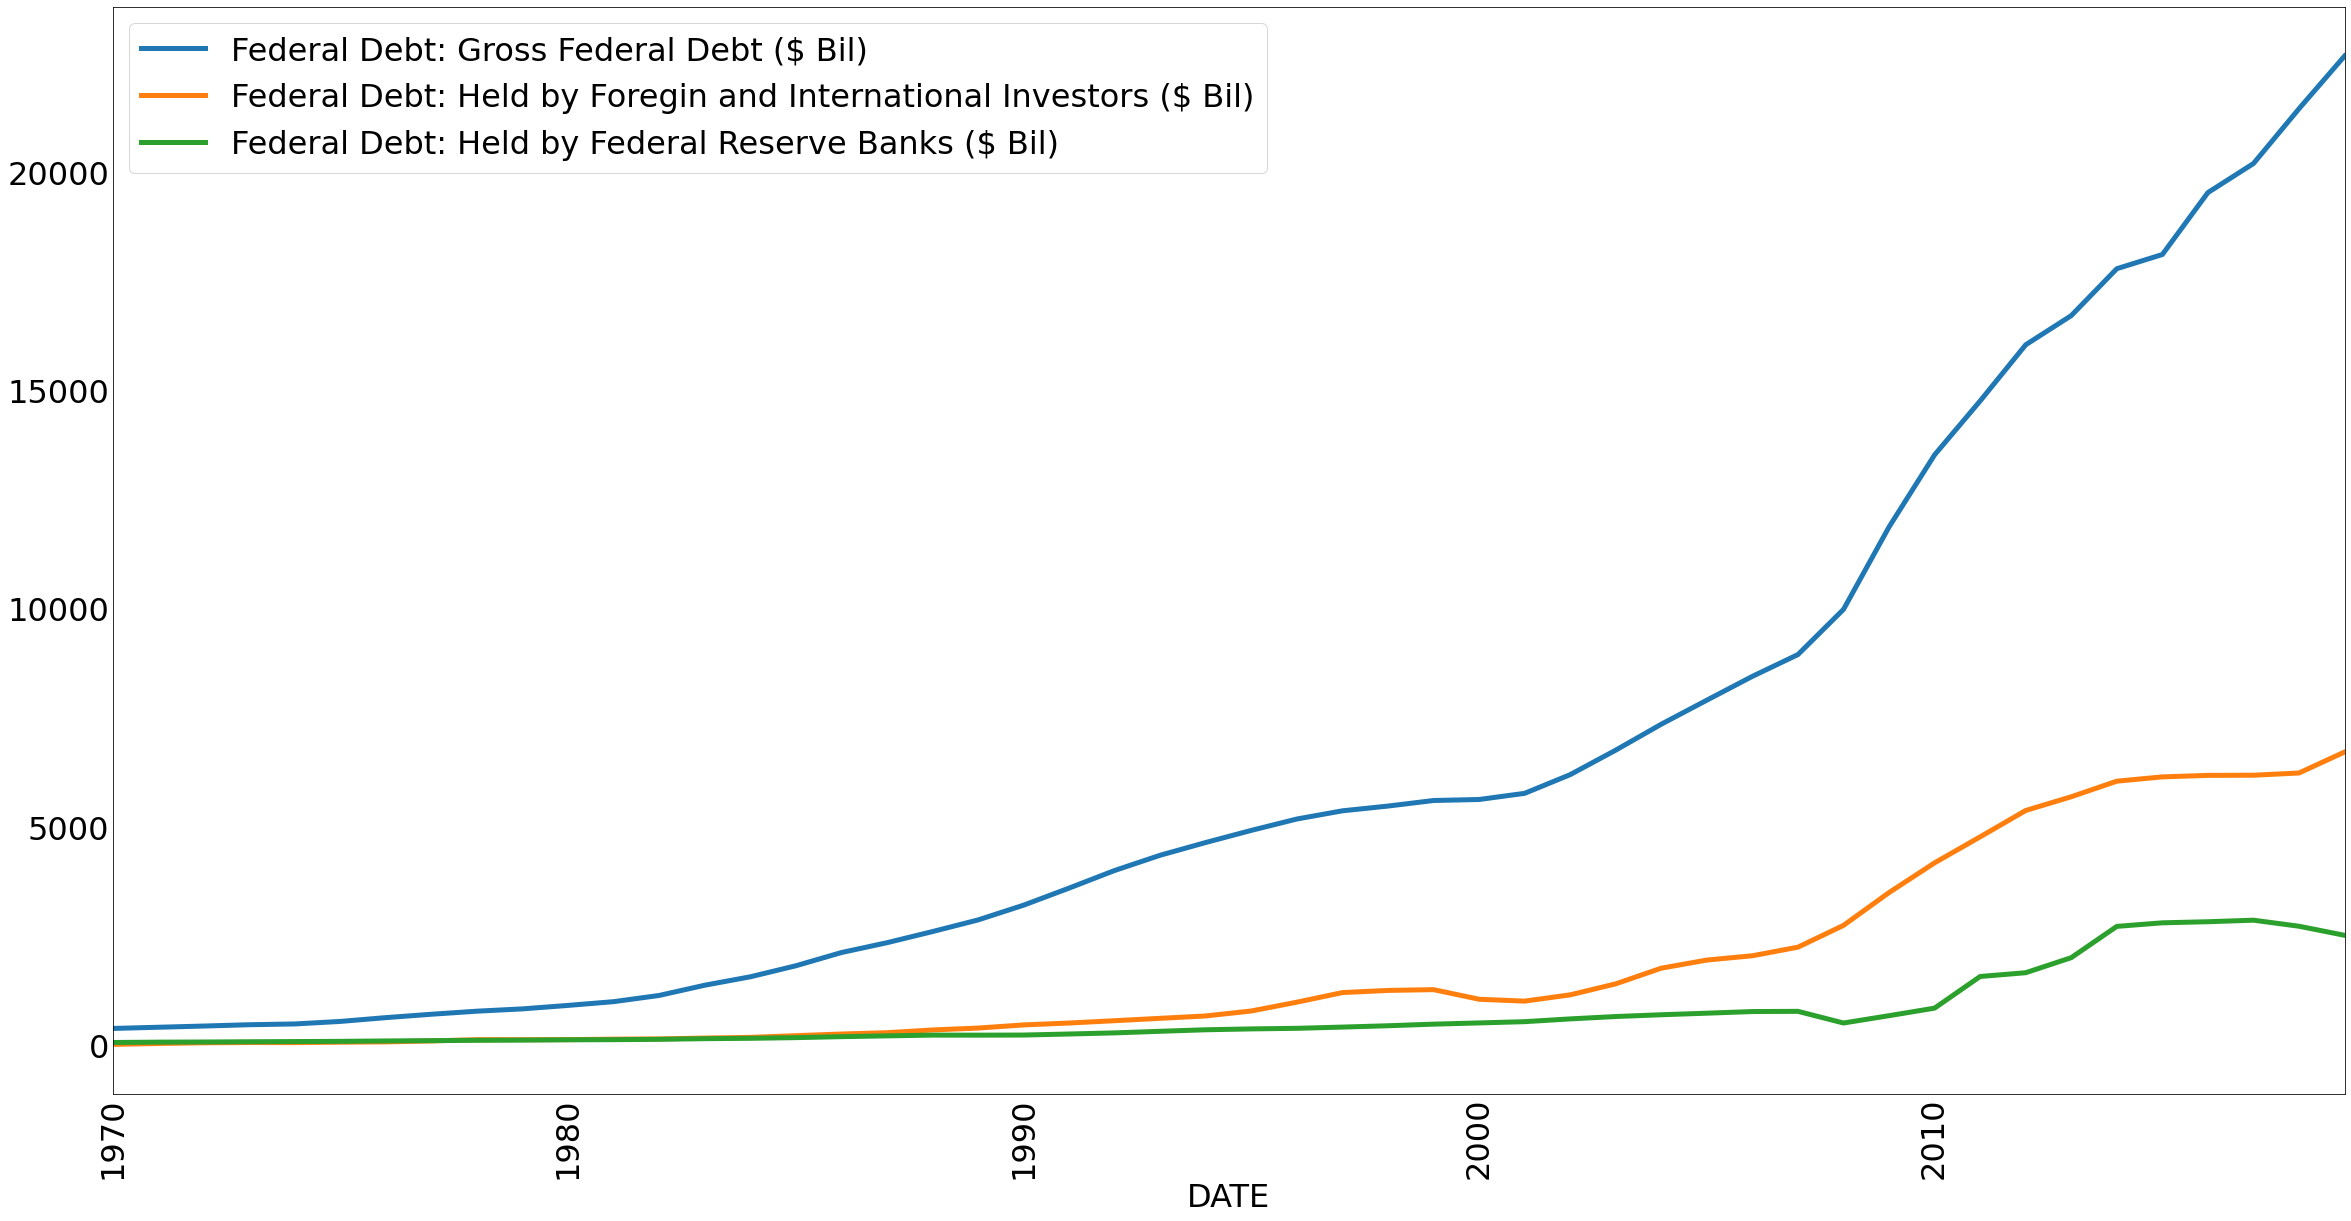

In [4]:
from datlib.plots import *

plt.rcParams.update({"font.size":32})
plot_lines(df = data, linewidth = 5, figsize = (40, 20), pp = None)

In [6]:
plot_stacked_lines(df = data, lindewidth = 5)

NameError: name 'plot_stacked_lines' is not defined

Now that we used the line graph we created earlier, let's try out the time series graph. This should give us a better understanding of what we are looking at. We will use each pair of variables to see if there is any correlation.

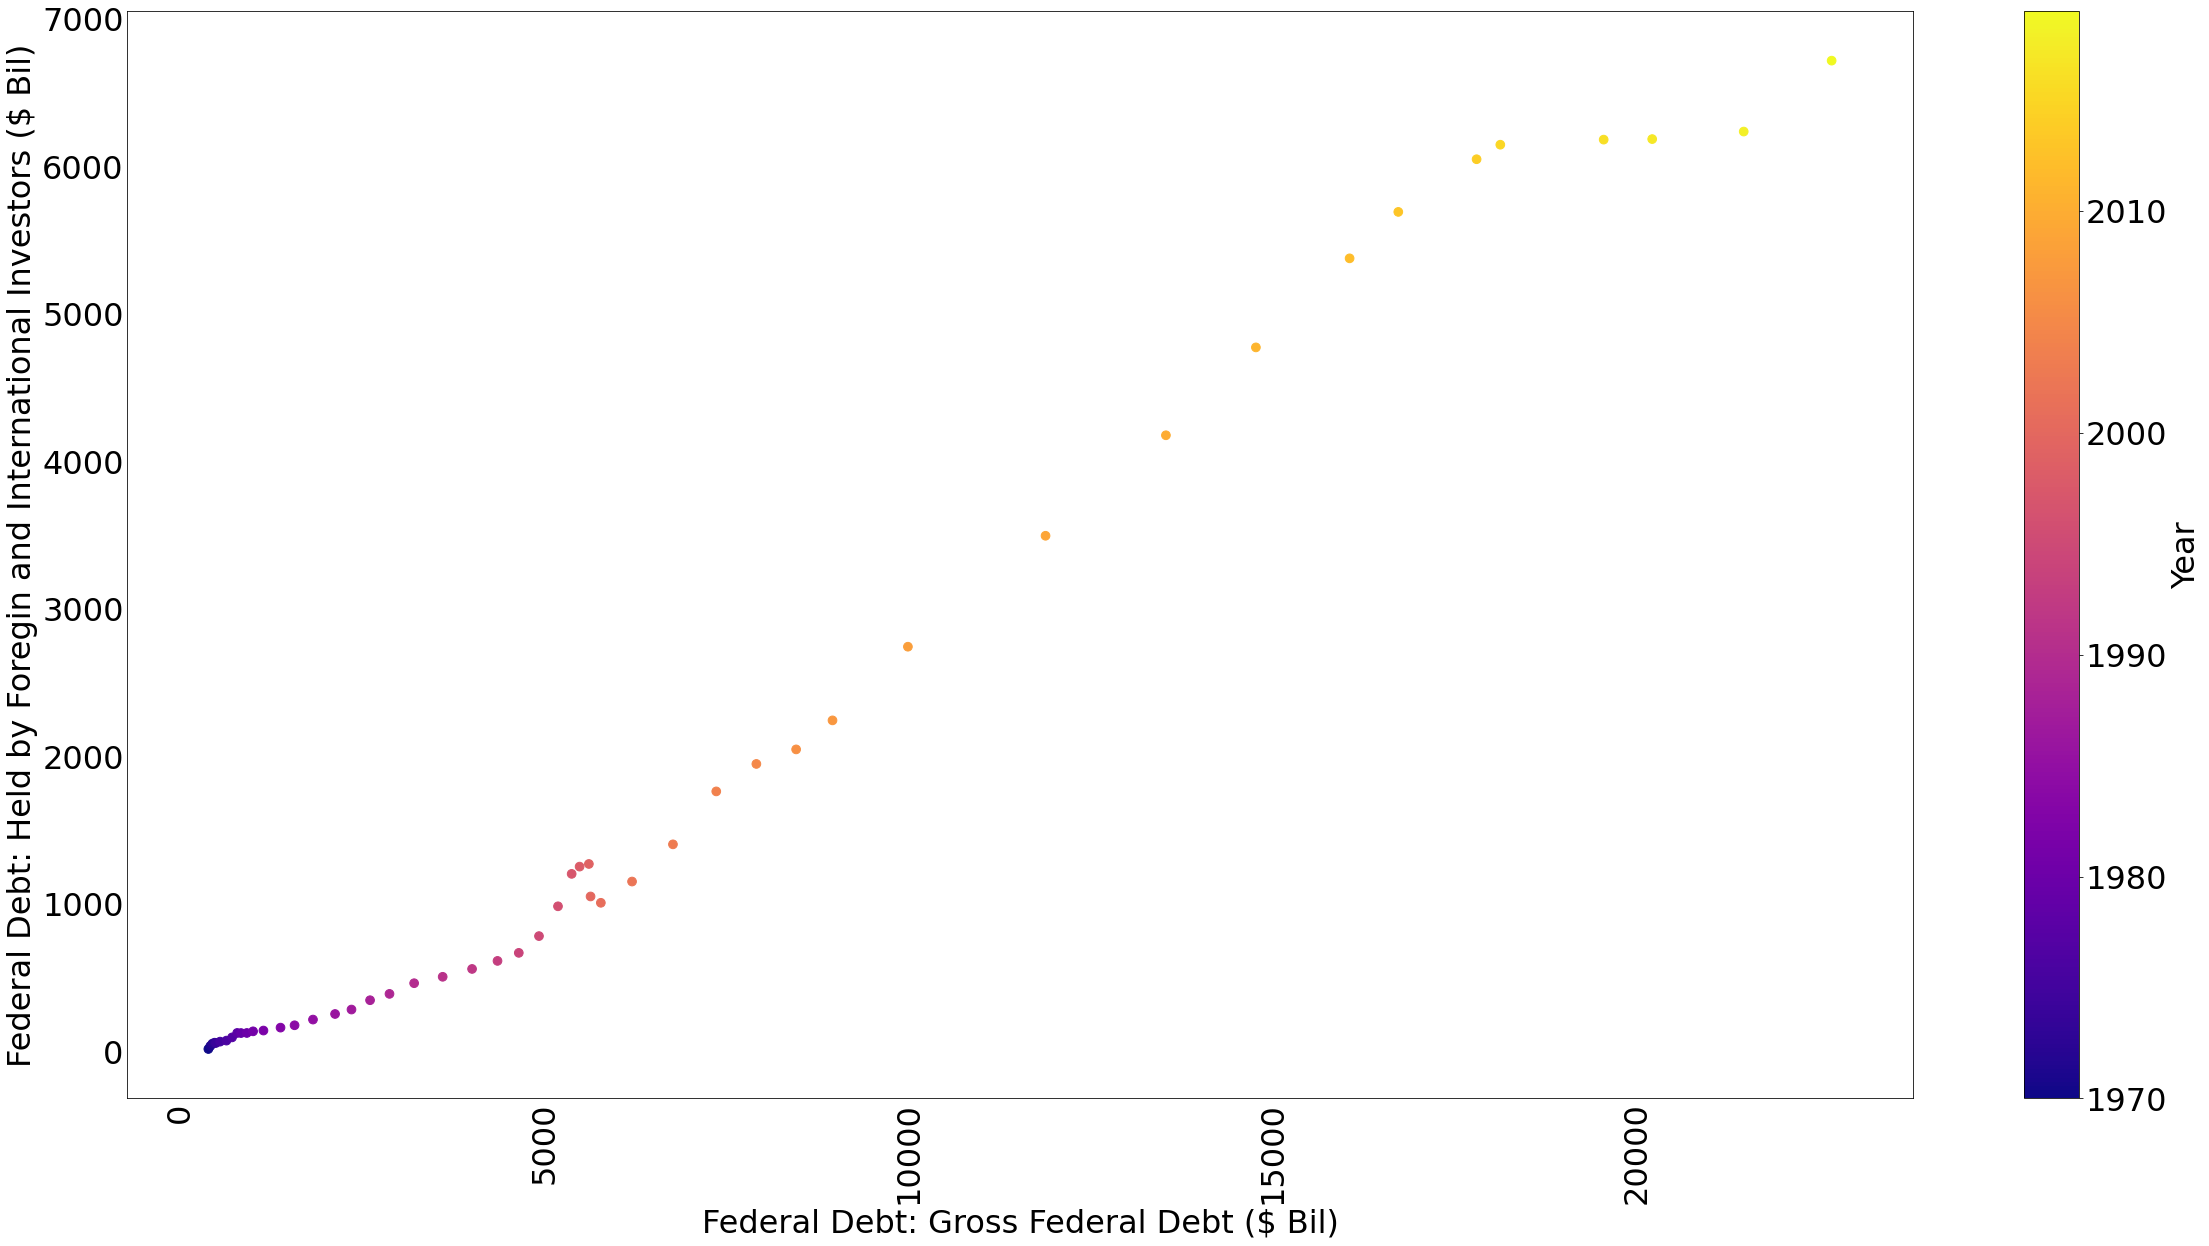

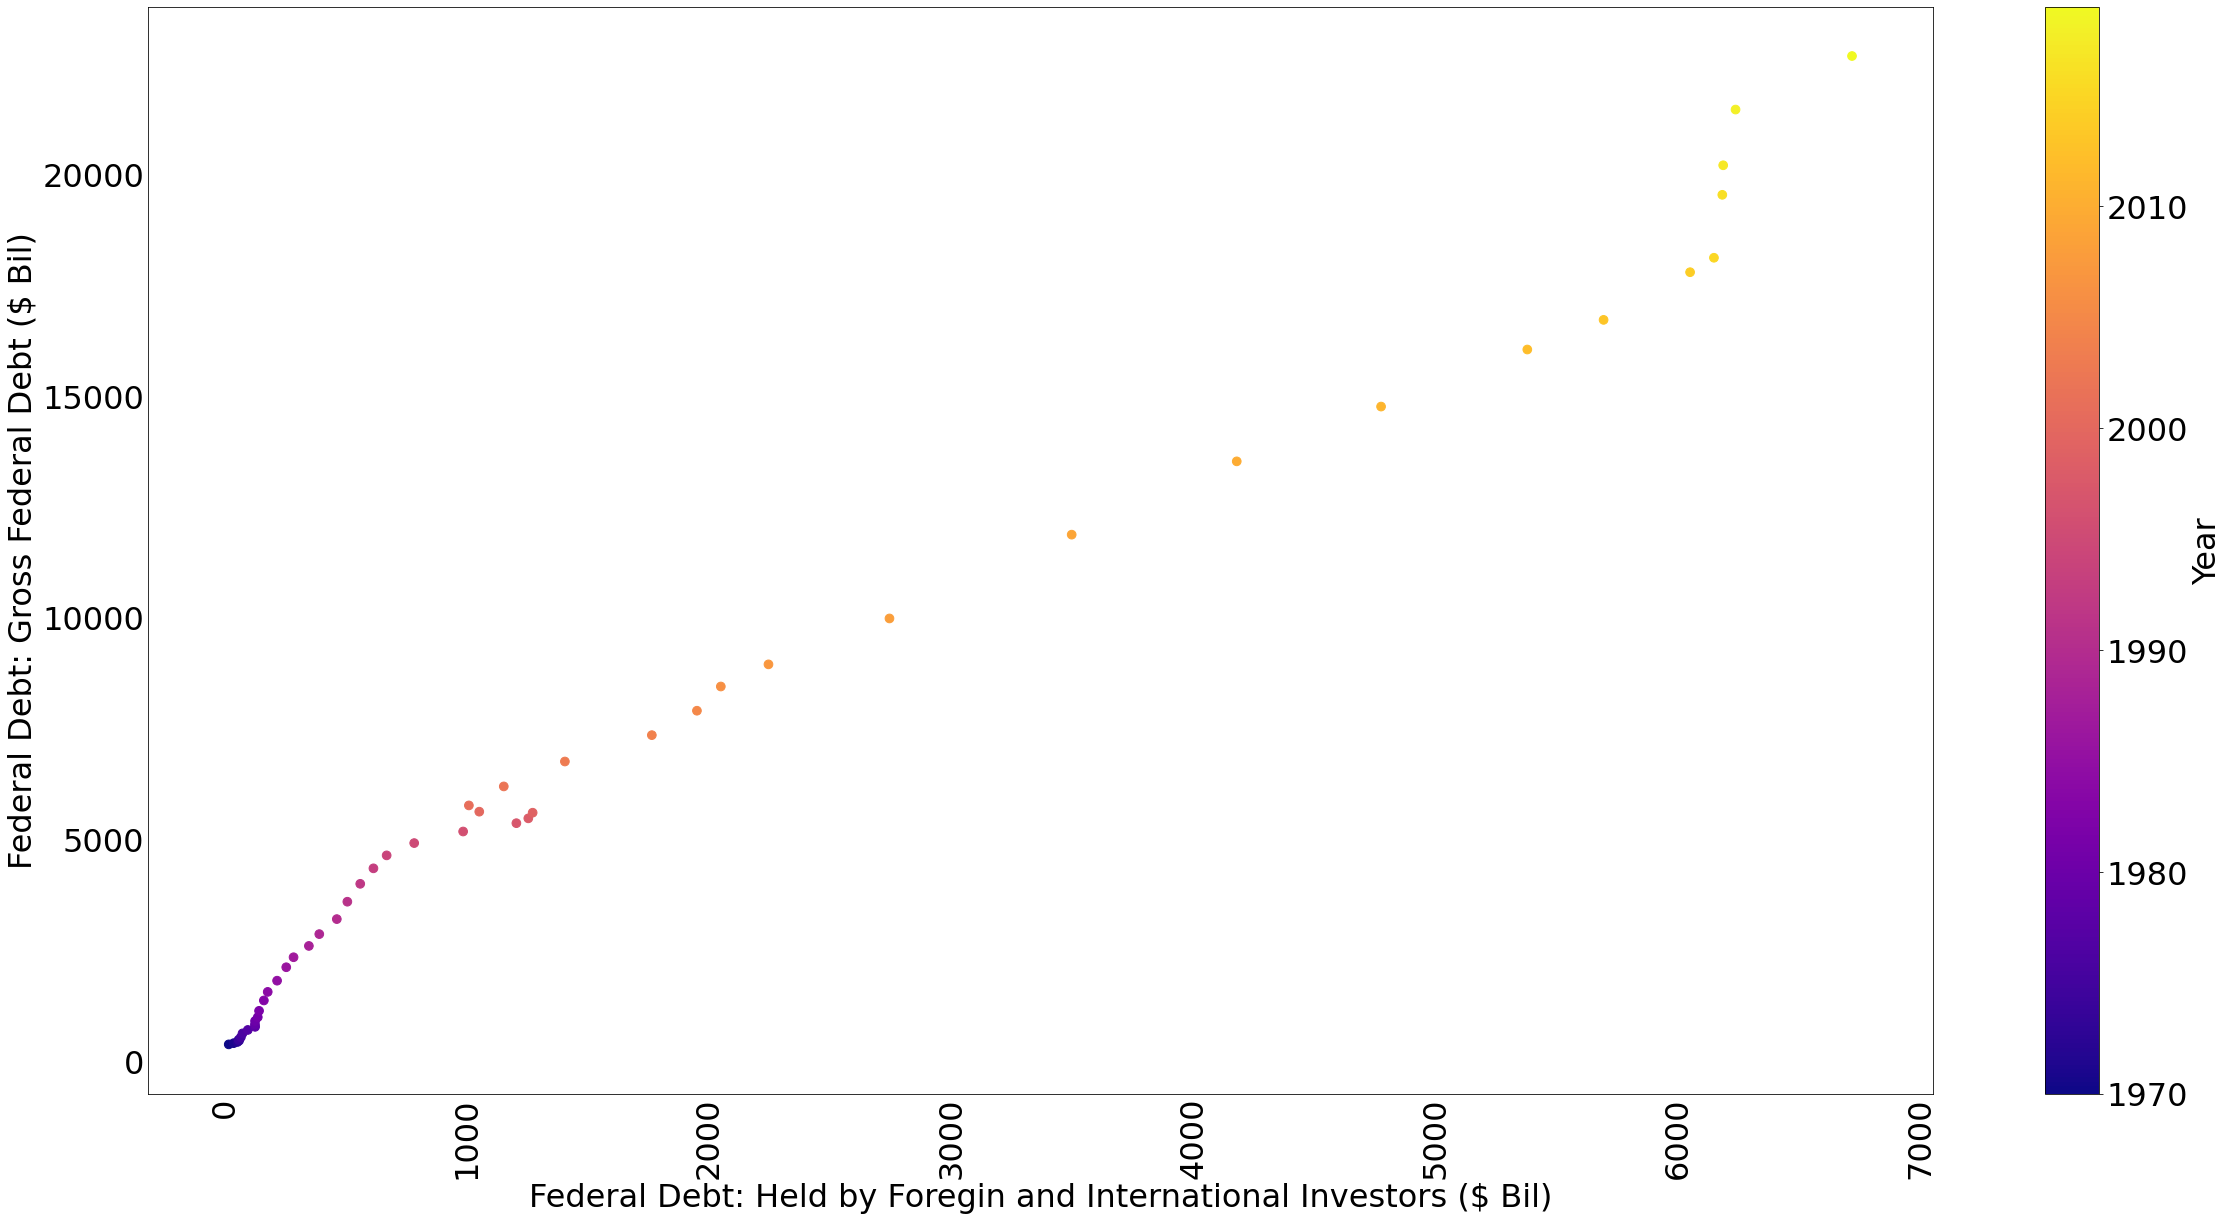

In [5]:
scatter_vars1 = ["Federal Debt: Gross Federal Debt ($ Bil)",
              "Federal Debt: Held by Foregin and International Investors ($ Bil)"]

plt.rcParams.update({"font.size":32})
plot_ts_scatter(data[scatter_vars1])